# Student Performance Indicator

## Life cycle of a Machine Learning Project

* Understanding the problem statement
* Data xolletion
* Data checks to perform
* Exploratory data analysis
* Data pre-processing
* Model training
* choose best model

### 1) Problem statement

* This projects understand how the student's performance(test score) is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course.

### 2) Data collection

* Data source - https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics
* The data consits of 8 columns and 100 rows.

#### 2.1 Import data and requires packages
importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



## Import the csv Data sa Pandas DataFrame

In [78]:
import os
os.getcwd()

'd:\\GitHub\\End_To_End_ML_Projects\\src\\notebook'

In [79]:
df = pd.read_csv('data\exams_performance.csv')

In [80]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [81]:
df.shape

(1000, 8)

### 2.2 Dataset information

* gender: sex of students->(Male/Female)
* race/ethnicity: ethnicity of students->(Group A,B,C,D,E)
* parental level of eduation: parent's final education->(bachelor's degree, some college, master's degree, associate's degree, high school)
* lunch: having lunch before test(standard or free/reduced)
* test preparation course: complete or not complete before test
* maths score
* reading score
* writing score

### 3) Data checks for perform

* check missing values
* check duplicates
* check data type
* check the number of unique values of each column
* check statistics of dataset
* check various categories present in the  different categorical column

#### 3.1 Check missing values

In [82]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

#### 3.2 Check duplicates

In [83]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

#### 3.3 Check data types

In [84]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [85]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

#### 3.5 Check statistics of dataset

In [86]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#### Insight

* From above description of numerical data, all means are very close to each other- between 67.8 and 70.4;
* All standard deviations are also close- between 14.10 and 15.25;
* While the minimum score for both math and writing is 15, the minimum score for reading is significantly higher at 25.

#### 3.7 Exploring Data

In [87]:
print("Categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:   ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['completed' 'none']


In [88]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in df.columns if df[feature].dtype =='object']

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Feature Engineering
#### 3.8 Adding columns for "Total Score" and "Average"

In [89]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [90]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 9
Number of students with full marks in Writing: 13
Number of students with full marks in Reading: 10


In [91]:
math_less_20 = df[df['math score'] <=20]['average'].count()
writing_less_20 = df[df['writing score'] <=20]['average'].count()
reading_less_20 = df[df['reading score'] <=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 2
Number of students with less than 20 marks in Writing: 2
Number of students with less than 20 marks in Reading: 0


#### Insights
* From above values we get students have performed the worst in the Maths
* Best performance in reading section

### Exploring Data (Visualization)
* Histogram
* Kernel Density Estimate (KDE)

#### 4.1.1 Histogram & KDE

In [106]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.0
1,male,group D,associate's degree,standard,none,96,93,87,276,92.0


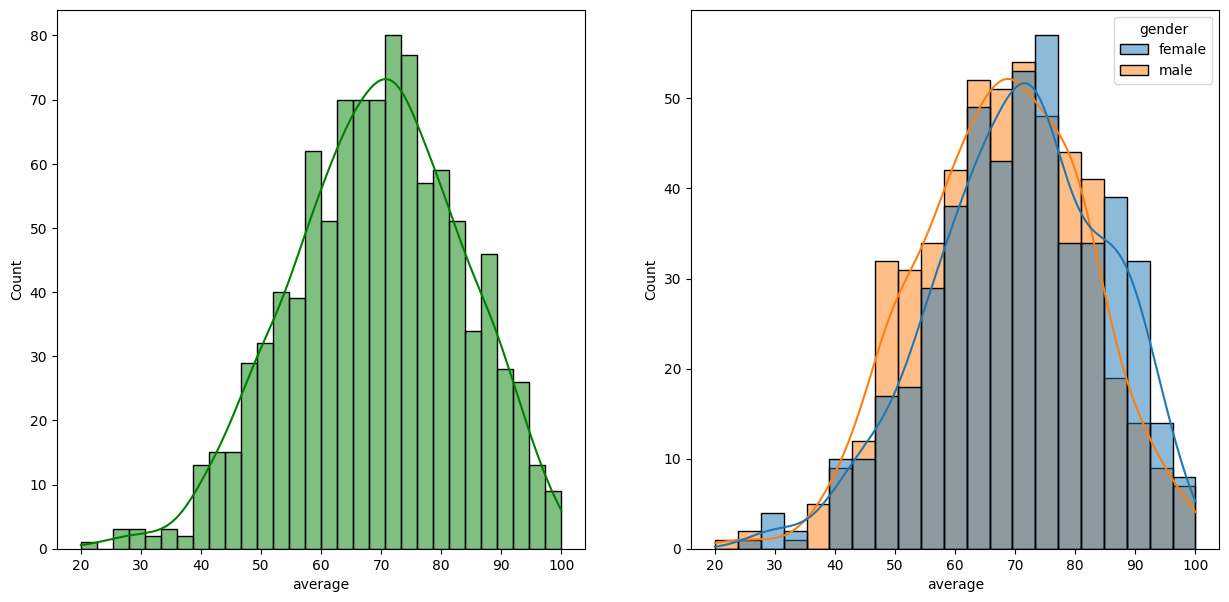

In [123]:
# Creating subplots
fig, axs = plt.subplots(1,2, figsize=(15,7))

# First plot: histogram of 'average' scores
sns.histplot(data=df, x='average' ,bins=30, kde=True, color='g', ax=axs[0])

# Second plot: histogram of 'average' scores with hue by 'gender'
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

# Display the plots
plt.show()


#### Insights
* Female students tend to perform well than male students

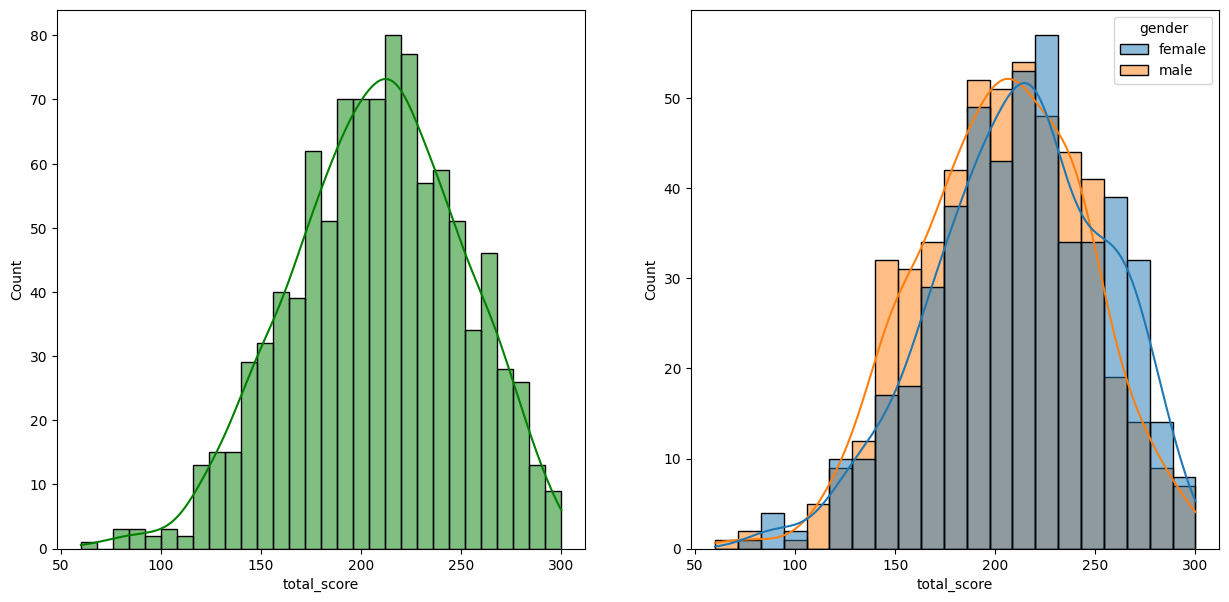

In [124]:
# Creating subplots
fig, axs = plt.subplots(1,2, figsize=(15,7))

# First plot: histogram of 'average' scores
sns.histplot(data=df, x='total_score' ,bins=30, kde=True, color='g', ax=axs[0])

# Second plot: histogram of 'average' scores with hue by 'gender'
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])

# Display the plots
plt.show()

#### Insights
* Female students tend to perform well than male students.

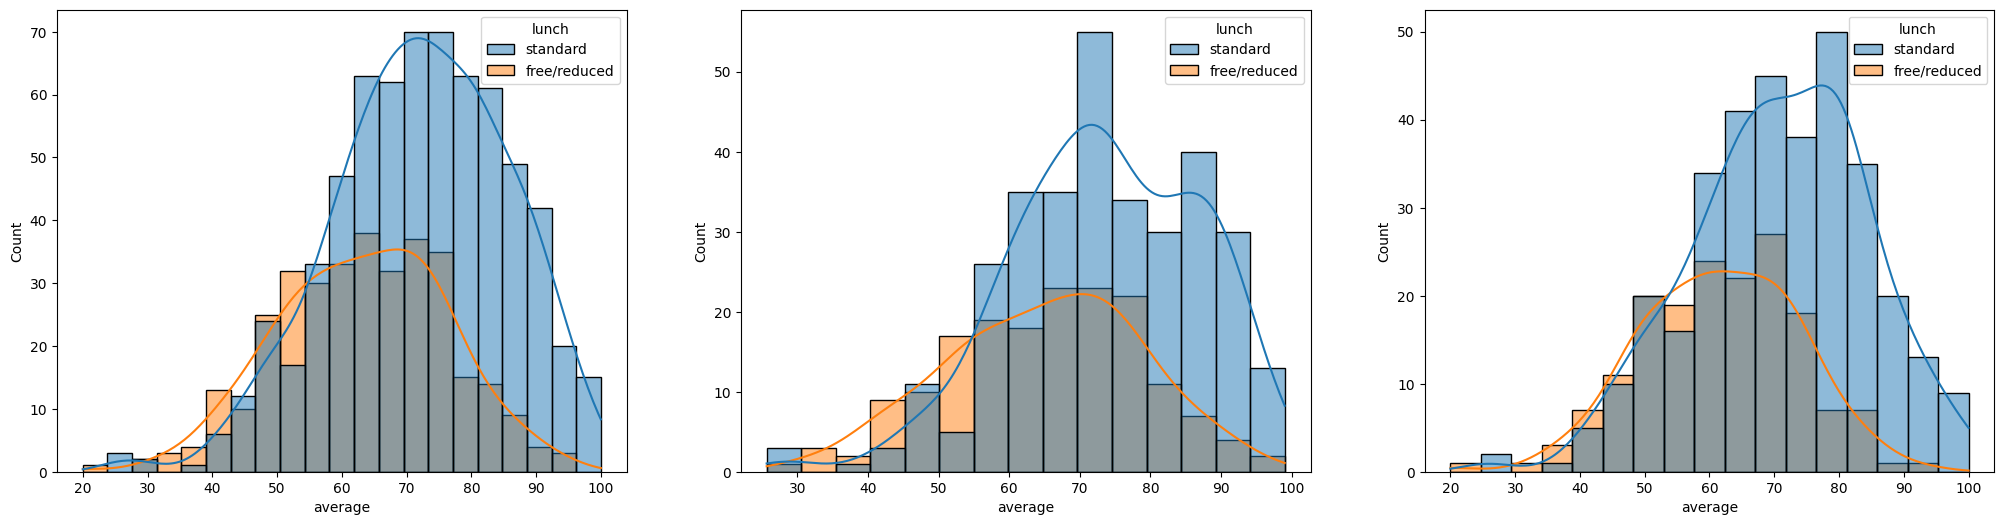

In [141]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0]) 

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', ax=axs[1])

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', ax=axs[2])

plt.show()

#### Insights
* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male or female.